# 本福特自动机

## 问题

对于任意一个正整数 $x_0$，对它乘 $2$，重复进行 $t$ 次并都记录下所得的数字的首位数字。

从 $x_0 = 1 \dots 9$ 开始试验，并把所得的数的首位数合在一起，这些首位数字的分布是什么样的？

## 解法

### 计算首位数字

这个问题的一个难点是计算一个数 $x$ 的首位数字。

* 如果 $x$ 在 $1$ 到 $10$ 之间（包括 $1$ 但不包括 $10$），那么好办，我们只要把它取整即可。
* 如果 $x>=10$，那我们可以对它反复除 $10$ 直到它在 $[1, 10)$ 以内，这就回到了上一步的问题。

以上想法可以转换为下面这算法：

```
def get_leading_digit(x):
    while x >= 10:
        x //= 10
    return int(x)
```

注意，我们这里用了 Python 的 `x //= 10` 除法，这样它可以同时用于大整数和浮点数的计算。
当然如果把 `x` 当成是浮点数变量，用一般的除法 `x /= 10` 也是没有问题的，最后把`x`转换为整数 `return int(x)` 即可。

严格讲起来，我们还要考虑 $[0, 1)$ 里的数和负数，但这里我们用不到，就不写了。

下面是一个参考程序。

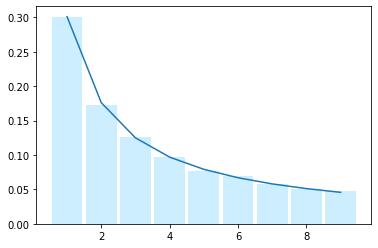

In [39]:
import math

def get_leading_digit(x):
    while x >= 10:
        x //= 10 # "//" 可以用于大整数和浮点数
    return int(x)

def multiply(x0, tmax):
    return [get_leading_digit(x0 * 2**t) for t in range(tmax+1)]

def simulation(tmax):
    result = []
    for x0 in range(1, 10):
        result.extend(multiply(x0, tmax))
    return result
                    
import matplotlib.pyplot as plt
plt.hist(simulation(100), bins=9, range=(0.5,9.5), density=True, color='#cef', rwidth=0.9)
plt.plot(range(1, 10), [math.log10(1+1/x) for x in range(1, 10)])
plt.show()

### 从单个数字开始模拟

其实我们并不用从 $9$ 个数字开始然后平均，即便是从单一的一个数，比如 $x = 7$，开始模拟也会得到相似的结果。

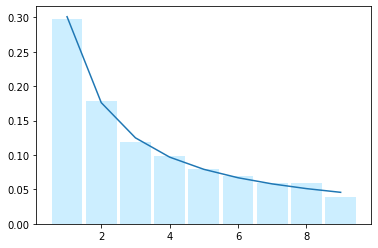

In [58]:
plt.hist(multiply(7, 100), bins=9, range=(0.5,9.5), density=True, color='#cef', rwidth=0.9)
plt.plot(range(1, 10), [math.log10(1+1/x) for x in range(1, 10)])
plt.show()

## 首数字分布的理论

很显然，我们得到的分布不是一个均匀分布。为什么呢？

### 1. 对数数轴上的运动

为了回答这个问题，让我们考虑一下 $\log_{10} x$ 在 $x$ 被乘 2 后是怎么变化的。

乘 $2$ 这个操作对应于：

$\begin{align}
\log_{10} x &\rightarrow \log_{10} x + \log_{10} 2 \\
&\approx \log_{10} x + 0.301\dots
\end{align}$

也就是对应于在对数数轴 $\log_{10} x$ 上的一个平移。

### 2. 首数字在对数数轴上的表示

由于我们只对首数字感兴趣，我们可以等价地只考虑 $\log_{10} x$ 的小数部分，也就是把 $\log_{10} x$ 周期性地折回 $[0, 1)$ 之间。

比如，$x = 32, \log_{10} x = 1.505$ 取小数部分得到的是 $\log_{10} x' = 0.505$，对应于 $x' = 3.2$；两者的首数字是相同的。

这样，对于首数字而言，我们只需要考虑的是一个它的对数的小数部分（上例中的 $0.505$）在 $[0, 1)$ 中的位置。

比如，对 $\log_{10} x$ 的小数部分
 * 如果落在 $[0, \log_{10} 2) \approx [0, 0.301)$ 区间里，则首数字是 $1$ 
 * 如果落在 $[\log_{10} 2, \log_{10} 3) \approx [0.301, 0.477)$ 区间里，则首数字是 $2$
 * ……
 * 如果落在 $[\log_{10} 9, 1) \approx [0.954, 1)$ 区间里，则首数字是 $9$

### 3. 对数数轴上的分布

由于乘 $2$ 对应于 $\log_{10} x$ 的一个平移，平移量 $\log_{10} 2 = 0.301\dots$ 又不是一个有理数。
可以想象

**猜想**：反复乘 $2$ 操作会把 $\log_{10}x$ 的小数部分打乱，使其成为在 $[0, 1)$ 成为一个均匀分布。

这个猜想我们会在后面做进一步解释，这里我们先假定它是合理的。（它的数学原理和同余随机数发生器的原理是类似的。）

### 4. 首数字的概率

所以，首数字为 $1$ 的几率为 $0.301 - 0 \dots \approx 30.1\%$，会远远比首数字为 $9$ 的几率 $1-0.954\dots \approx 4.6\%$ 大！

一般地，首数字为 $d$ 的几率为

$p(d) = \log_{10}\left(\frac{d+1}{d}\right).$

在上述程序中， 折线所显示的就是这个公式的值。我们看到和模拟的直方图的结果是非常接近的。

## 本福特定律

这个公式叫做本福特定律。它是由 Simon Newcomb 和 Frank Benford 发现的。

本福特定律，或首位是1的数字大约占到30%的现象，无处不在。它也经常作为一个统计工具来监测数据异常。

比如，斐波那契数列

$a_0 = 0$, $a_1 = 1$, $a_{n} = a_{n-1} + a_{n-2}$ （$n \ge 2$） 

这个数列的首数字也是满足本福特定律的。我们可以验证一下

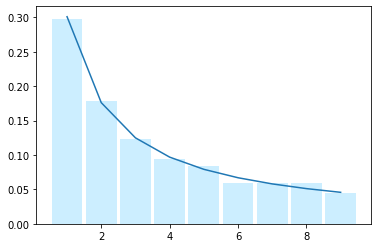

In [56]:
def fibonacci(n):
    x, y = 1, 1
    result = [x, y]
    for i in range(n):
        x, y = y, x + y
        result.append(get_leading_digit(y))
    return result

plt.hist(fibonacci(200), bins=9, range=(0.5,9.5), density=True, color='#cef', rwidth=0.9)
plt.plot(range(1, 10), [math.log10(1+1/x) for x in range(1, 10)])
plt.show()

## 对数数轴上的分布

回到我们之前的理论问题。为什么我们说 $\log_{10} x$ 的小数部分在$x$反复乘$2$的过程中，最后会满足一个 $[0, 1)$ 之间的均匀分布。

假定 $y$ 是 $\log_{10} x$ 的小数部分，现在 $x$ 在每次操作时会被乘以 2，那么 $y$ 会被加上 $\log_{10} 2 = 0.301\dots$ 后取整。

我们的问题是，长期以往下去，$y$ 的序列满足怎样一个分布呢？

### 1. 系综

我们现在考虑有许多 $y$，它们构成了一个**系综**。对这个系综，我们会有一个分布 $f(y)$。

我们考虑的问题是这样的：在系综里的每个 $y$ 在经历一次乘 2 操作后，这个系综的分布 $f(y)$ 是怎么变化的呢？

### 2. 分布

为了简化讨论，我们把这个分布离散化，分为 10 个区间

$[0, 0.1), [0.1, 0.2), \dots, [0.9, 1)$

我们的分布 $f(y)$ 可以用10个数字来代替

| 序号 | <div style="width:90px">区间</div> | $f_n$ |
|------|-------|-----|
| $0$ | $[0, 0.1)$ | $f_0$ |
| $1$ | $[0.1, 0.2)$ | $f_1$ |
| ... | $\dots$ | $\dots$ |
| $9$ | $[0.9, 1)$ | $f_9$ |

这些数字满足：

$f_0 + f_1 + \cdots + f_9 = 1$

### 3. 分布的演化

现在我们可以考虑这个分布的在一步操作后的变化了。

这里我们再做一个近似：$\log_{10} 2 \approx 0.3$。

* 如果一开始 $y$ 在区间 0 ，那么下一步，它被加上 $0.3$ 以后，就会落入区间 3

* 一开始 $y$ 在区间 1，下一步会在区间 4

* 一开始 $y$ 在区间 2，下一步会在区间 5

* ...

* 一开始 $y$ 在区间 9，下一步会在区间 2

如果我们用 $f'$ 代表一步操作以后的分布，我们有

* $f'_3 = f_0$
* $f'_4 = f_1$
* ...
* $f'_2 = f_9$

### 4. 稳态分布

现在我们看看这个分布最后稳定后会长什么样子。这时，我们有

$f'_i = f_i$

比如，由上，我们有 $f_0 = f'_3$，但由于是稳态，我们还有 $f'_3 = f_3$，所以我们有 $f_0 = f_3$。
也就是说，在稳态解里，$y$ 落在 $[0, 0.1)$ 比例和在 $[0.3, 0.4)$ 里的比例是相同的。

用相同的逻辑进行推理，我们有

* $f_3 = f_6$
* $f_6 = f_9$
* $f_9 = f_2$
* $f_2 = f_5$
* $f_5 = f_8$
* $\dots$

最后的结果就是，所有的 $f_i$ 的值必须都相同！也就是说最后 $y$ 会满足一个均匀分布！

当然，我们这里的论证比较粗糙，严格地讲，我们需要把 $[0, 1)$ 分成无穷多个区间。但是基本思想就是这样。

而且另一个问题是，$\log_{10} 2$ 并不严格等于 $0.3$，也就是说 $[0, 0.1)$ 不会被完全映射到 $[0.3, 0.4)$ 里。
实际上，$\log_{10} 2$ 是无理数这个特点会帮助这个分布均匀化。 

### 5. 趋向平衡的过程

虽然我们说稳态解是均匀分布，我们并没有证明这个解是稳定的。也就是说，如果一开始我们的系综不是稳态分布，在一步以后，它是否会更趋近于稳态分布还是离开稳态分布越来越远呢？这个问题就比较复杂，要用到转移矩阵的特征值，这里就不讨论了。暂且我们假定如果所乘的数 $m$ 对应的 $\log_{10} m$ 是个无理数，这个均匀分布是稳定的。

### 6. 时间平均和系综平均

最后还有个问题，我们这里应用了系综这个概念，假定了有一群类似的 $y$，分布就是从这个系综算出来的。

但这个系综是假想的，实际上我们可能只有一个 $y$ 在重复操作。为什么系综理论可以用在这里呢？

我们可以这么想，对于一个$y$ 的序列，我们的系综是由它最开始的 $M = 10000$ 个值构成的。

在一步操作后，这个系综变成了序列中第 $2$ 个值到第 $M + 1$ 个值；

下一步操作后，变成了序列中第 $3$ 个值到第 $M + 2$ 个值；

以此类推。如果均匀分布是稳定的，那么这个序列除了最开始那些值，后面的值构成的分布基本上就能很好地满足稳态分布了。

### 7. 总结一下

如果我们每次对 $x$ 乘以 $2$，那么 $\log_{10} x$ 的小数部分最后会满足一个均匀分布。 

其实我们每次乘以的数字可以是一个大于 $1$ 的实数 $m$，只要 $\log_{10} m$ 是给无理数，最后总会得到一个均匀分布。

## 连续演化的模型

我们可以把每次乘的数字 $2$ 分成两步操作，每次都是乘以 $m = \sqrt{2}$。

或者进一步细分为 $k$ 步操作，每次都是乘以 $m = \sqrt[k]{2}$。

在 $k$ 趋向无穷大时，它可以被一个连续的微分方程替代。

事实上，本福特定律一般是用连续演化的模型来推导的（比如用于人口增长，细胞繁殖等大数）。

从 $x_0$，我们用以下微分方程来演化

$dx/dt = x,$

这里的 $dt$ 相当于每次乘的数字减 1，即 $m = 1 + dt$。

这样得到的数字 $x(t)$ 的首数字的时间平均也是满足本福特定律的。

我们可以算出这个微分方程的解是

$x(t) = x_0 \exp(t).$

下面这个程序是模拟连续情形下的首数字分布。

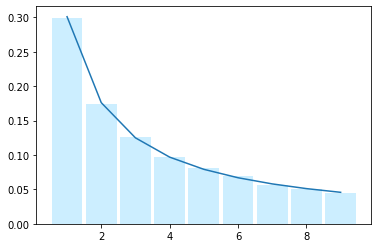

In [59]:
import random, math

def diff_eq(x0, tmax, dt):
    result = []
    x = x0
    nsteps = int(tmax/dt) + 1
    for step in range(nsteps):
        # 由于微分方程的解是 x = x0 exp(t)
        # 我们有 x(t+dt) = x(t) exp(dt)
        result.append(get_leading_digit(x))
        x *= math.exp(dt)
        # 为了防止 x 的值过大，我们把小数点左移几位
        while x > 10:
            x *= 0.1
    return result

plt.hist(diff_eq(3.14, 100, 0.1), bins=9, range=(0.5,9.5), density=True, color='#cef', rwidth=0.9)
plt.plot(range(1, 10), [math.log10(1+1/x) for x in range(1, 10)])
plt.show()

## 扩展阅读

* [李永乐老师对本福特定律的介绍](https://mp.weixin.qq.com/s/pXEr11FAesA2TmPSC8cN4A)